In [7]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

character(0)

# **3 Hands On: Data Exploration**

# **1 Summarization**

**Load the data set carIns final. It already has the imputation of missing values.**

In [8]:
load("/kaggle/input/data3taller/carIns_final.Rdata")
ls()

[1] "auth"                      "carIns_final"             
[3] "get_user_secret"           "GET_USER_SECRET_ENDPOINT" 
[5] "KAGGLE_BASE_URL"           "KAGGLE_IAP_TOKEN"         
[7] "KAGGLE_USER_SECRETS_TOKEN" "TokenBigQueryKernel"

**1.1  Using the package dplyr, answer the following questions:**


**(a) Obtain the number of cars by bodyStyle**

In [15]:
#usamos el package dplyr para eso llamamos a la libreria siguiente
library(dplyr)
#Obtener el número de autos por bodyStyle
car_count <- carIns_final %>%
  group_by(bodyStyle) %>%
  summarise(count = n())
#se imprime el resultado
car_count



bodyStyle,count
<fct>,<int>
convertible,6
hardtop,8
hatchback,70
sedan,96
wagon,25


** (b) Obtain the number of cars by bodyStyle and fuelType.**


In [26]:
#Obtener el numero de carros por bodyStryle y fuelType
car_count <- carIns_final %>%
  group_by(bodyStyle, fuelType) %>%
  count()
  #summarise(count = n())
#imprimimos el resultado
car_count

bodyStyle,fuelType,n
<fct>,<fct>,<int>
convertible,gas,6
hardtop,diesel,1
hardtop,gas,7
hatchback,diesel,1
hatchback,gas,69
sedan,diesel,15
sedan,gas,81
wagon,diesel,3
wagon,gas,22


**(c) Obtain the mean and the standard deviation of the attribute cityMpg by bodyStyle in ascending order.**

In [31]:
#Obtenemos la media y la diaviacion estandar de cityMpg por bodyStyle en forma ascendente
car_count <- carIns_final %>%
  group_by(bodyStyle) %>%
  summarize(cityMpg.mean = mean(cityMpg),cityMpg.sd = sd(cityMpg))%>%
  arrange(cityMpg.mean)  
#se imprime el resultado
car_count

bodyStyle,cityMpg.mean,cityMpg.sd
<fct>,<dbl>,<dbl>
convertible,20.50000,3.391165
hardtop,21.62500,5.423165
wagon,24.04000,4.217819
sedan,25.32292,6.599035
hatchback,26.31429,7.169870


**(d) Also by bodyStyle, and for the attributes cityMpg and highwayMpg, obtain the mean, the standard deviation, the median and the inter-quartile range.**

In [37]:
#Obtenemos la media,la diaviacion estandar, la median y el rango intercuartilico de cityMpg
car_count <- carIns_final %>%
  group_by(bodyStyle) %>%
  summarize(cityMpg.mean = mean(cityMpg),cityMpg.sd = sd(cityMpg),cityMpg.median=median(cityMpg),cityMpg.IQR = IQR(cityMpg),
           highwayMpg.mean = mean(highwayMpg),highwayMpg.sd = sd(highwayMpg),highwayMpg.median=median(highwayMpg),highwayMpg.IQR = IQR(highwayMpg))
#se imprime el resultado
car_count

bodyStyle,cityMpg.mean,cityMpg.sd,cityMpg.median,cityMpg.IQR,highwayMpg.mean,highwayMpg.sd,highwayMpg.median,highwayMpg.IQR
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
convertible,20.50000,3.391165,21,5.25,26.00000,4.289522,27.0,3.00
hardtop,21.62500,5.423165,23,7.00,27.25000,6.088631,27.5,5.00
hatchback,26.31429,7.169870,26,12.00,32.17143,7.044314,31.5,11.75
sedan,25.32292,6.599035,25,11.25,30.83333,7.174027,30.5,11.25
wagon,24.04000,4.217819,24,5.00,28.72000,4.703899,29.0,7.00


# **2 Visualization**

**2. Using the package ggplot2, create graphs that you find adequate to answer the following questions.**


In [38]:
#cargar el package ggplot2 o la libreria 
#en este caso el paquete ggplot2 ya viene instalado por defecto en Kaggle solo mandamos a llamar a su libreria
library(ggplot2)

**(e) Show the relationship between the attributes cityMpg and highwayMpg**

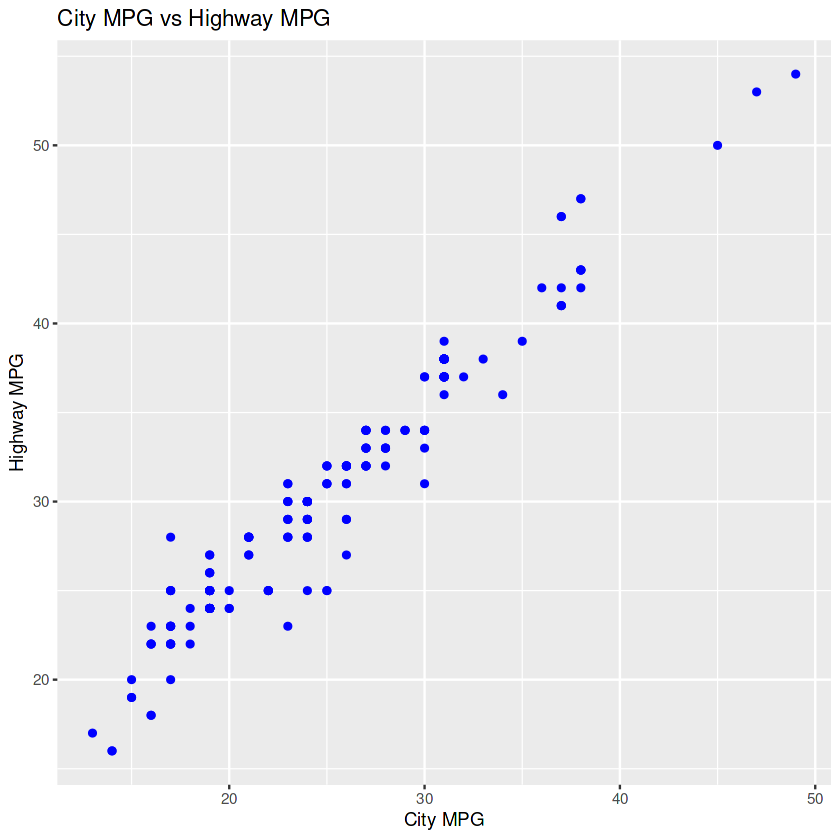

In [39]:
#Mostrar la relacion entre los atributos cityMapg y highwayMpg
ggplot(carIns_final, aes(x = cityMpg, y = highwayMpg)) +
  geom_point(color = "blue") +
  labs(title = "City MPG vs Highway MPG", x = "City MPG", y = "Highway MPG")

**(f) Show the distribution of cars by bodyStyle.**

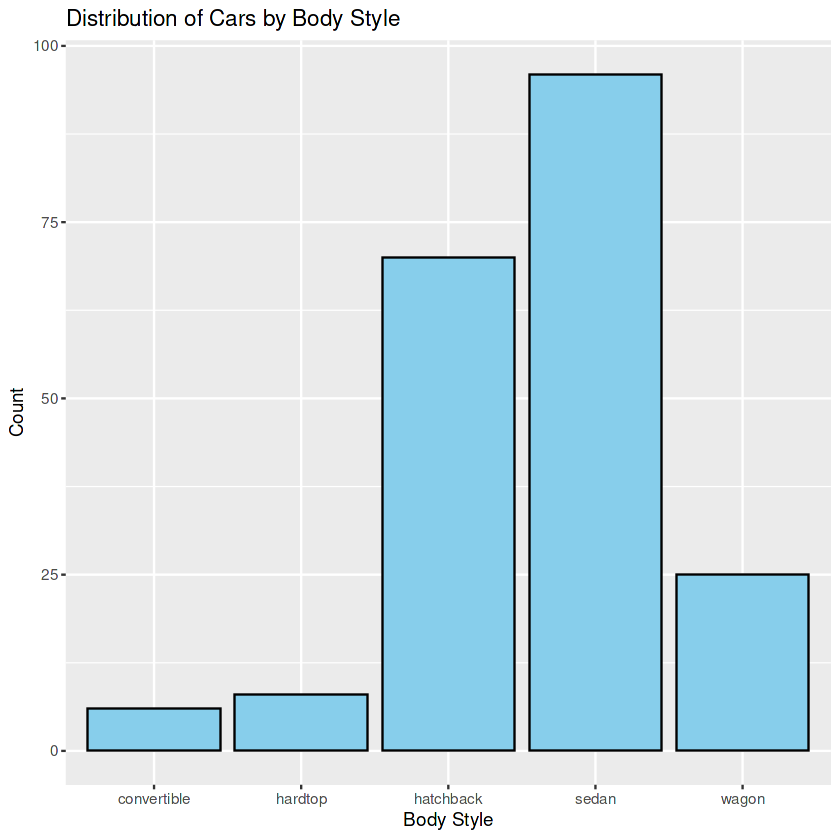

In [40]:
#Mostrar la distribucion de carros en el bodyStyle
ggplot(carIns_final, aes(x = bodyStyle)) +
  geom_bar(fill = "skyblue", color = "black") +
  labs(title = "Distribution of Cars by Body Style", x = "Body Style", y = "Count")


**(g) Show the distribution of cars by price. Suggestion: create bins of width equal to 5000.**

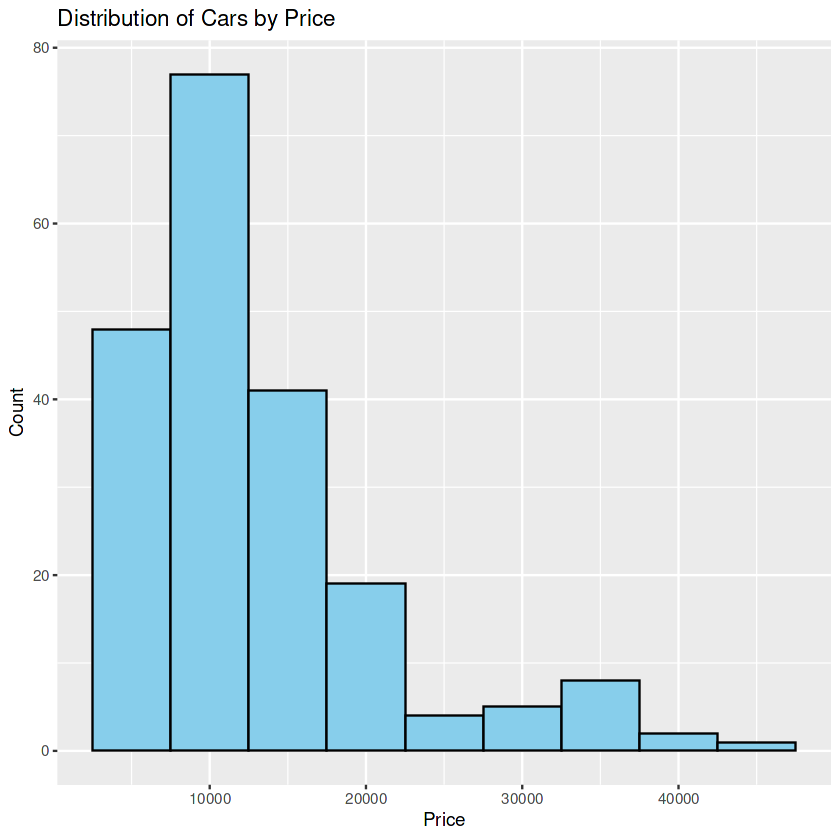

In [41]:
#mostrar la distribucion de los carros por su precio.
# Como sugerencia nos pide crear bins de ancho igual a 5000
ggplot(carIns_final, aes(x = price)) +
  geom_histogram(binwidth = 5000, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Cars by Price", x = "Price", y = "Count")


**(h) Add the information of the density estimation to the previous graph.**

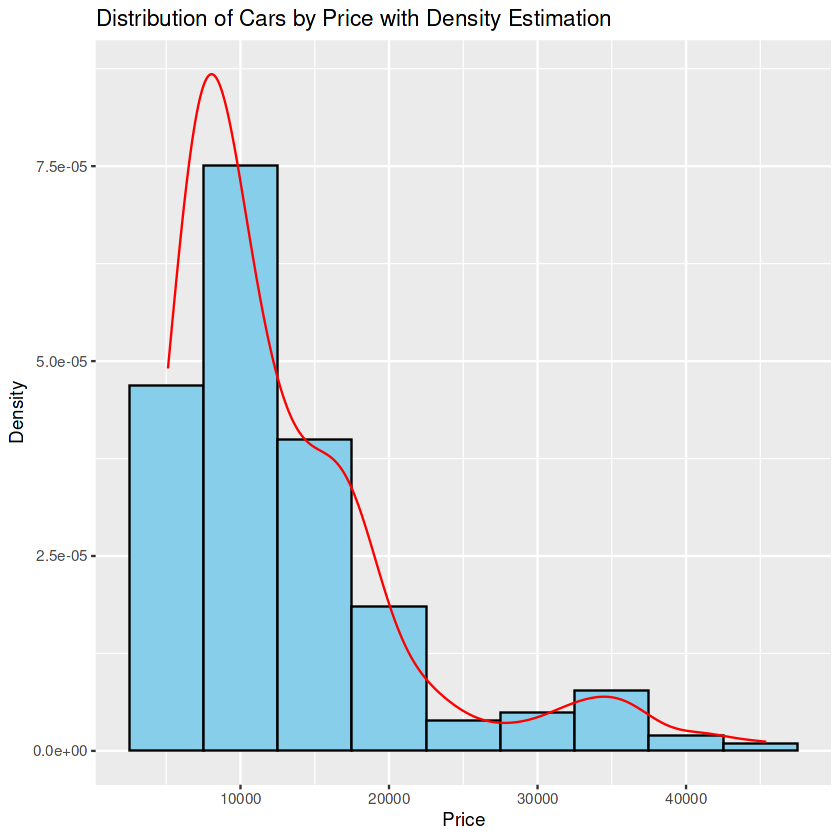

In [42]:
#Realizamos lo mismo del lietral anterior lo que se aumenta es la 
#informacion o la linea de codigo de la estimacion de la densidad
ggplot(carIns_final, aes(x = price)) +
  geom_histogram(binwidth = 5000, fill = "skyblue", color = "black", aes(y = ..density..)) +
  geom_density(alpha = 0.2, color = "red") +
  labs(title = "Distribution of Cars by Price with Density Estimation", x = "Price", y = "Density")


**(i) Check (visually) if it is plausible to consider that price follows a normal distribution.**

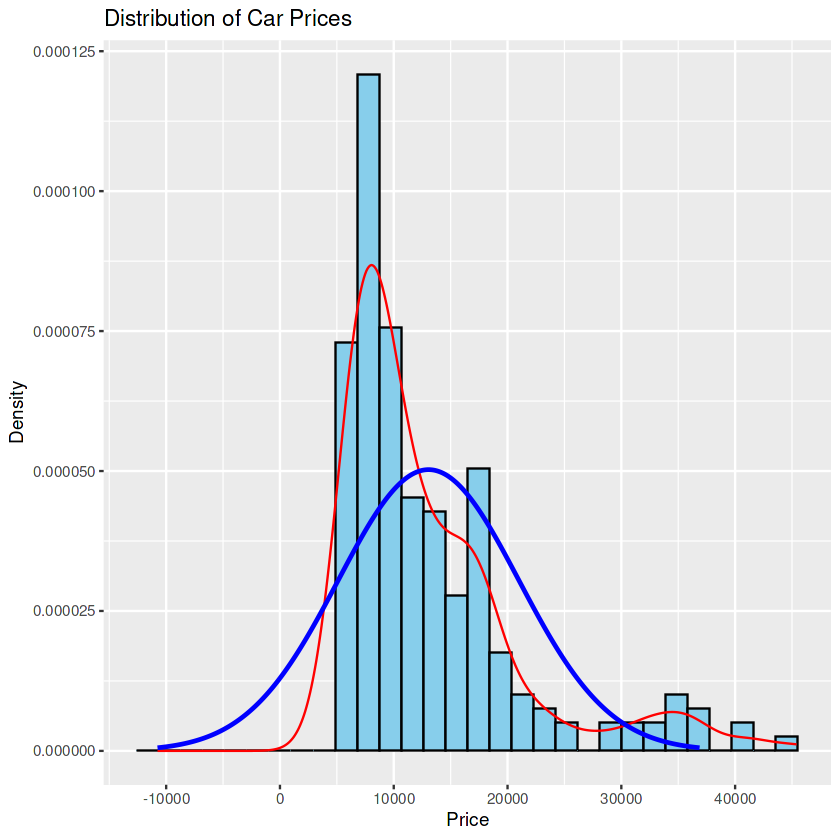

In [43]:
# Subconjunto de los datos para eliminar los valores faltantes
carIns_subset <- carIns_final %>% filter(!is.na(price))

# calculamos la media y la desviacion estandar del precio
price_mean <- mean(carIns_subset$price)
price_sd <- sd(carIns_subset$price)

# Generar una curva de distribución normal basada en la media y la desviación estándar
price_normal_dist <- data.frame(price = seq(price_mean - 3*price_sd, price_mean + 3*price_sd, length.out = 1000))
price_normal_dist$density <- dnorm(price_normal_dist$price, mean = price_mean, sd = price_sd)

# crear un histograma de la densidad y de la curva de distribucion normal
ggplot() +
  geom_histogram(data = carIns_subset, aes(x = price, y = ..density..), fill = "skyblue", color = "black", bins = 30) +
  geom_density(data = carIns_subset, aes(x = price), color = "red") +
  geom_line(data = price_normal_dist, aes(x = price, y = density), color = "blue", size = 1) +
  labs(title = "Distribution of Car Prices", x = "Price", y = "Density")


**(j) Show the distribution of price by make attribute. Suggestion: use boxplots and the function coord_flip().**


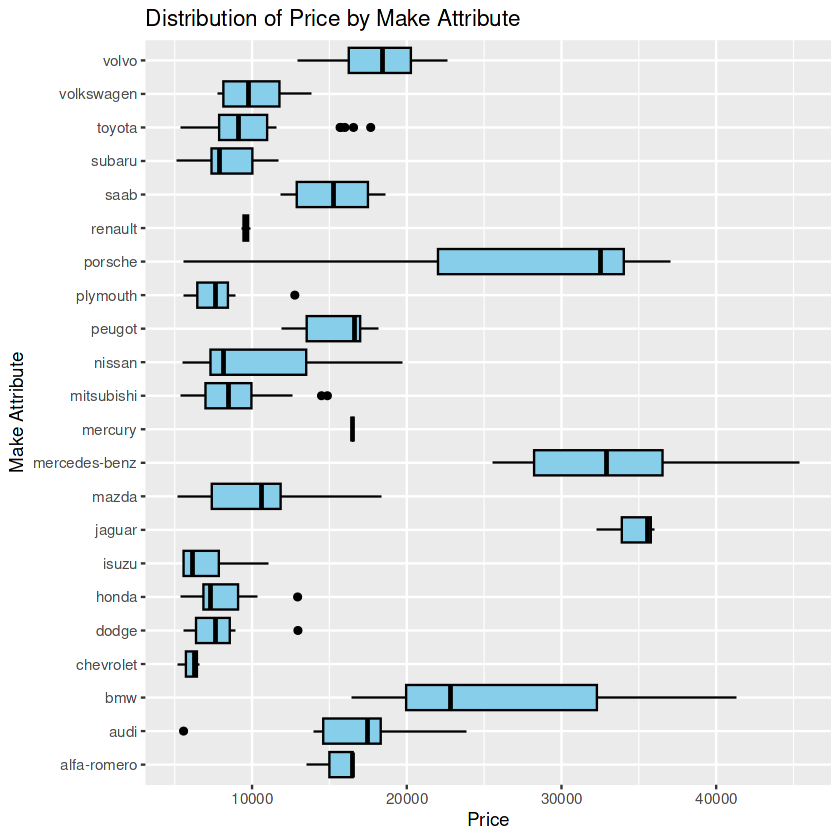

In [44]:
#Muestre la distribucio del precio por atributo de marca 
#Como sugerencia pide usar diagramas de caja y la función coord_flip().
ggplot(carIns_final, aes(x = make, y = price)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  coord_flip() +
  labs(title = "Distribution of Price by Make Attribute", x = "Make Attribute", y = "Price")


**(k) Show the distribution of price by nDoors attribute. Suggestion: use histograms.**

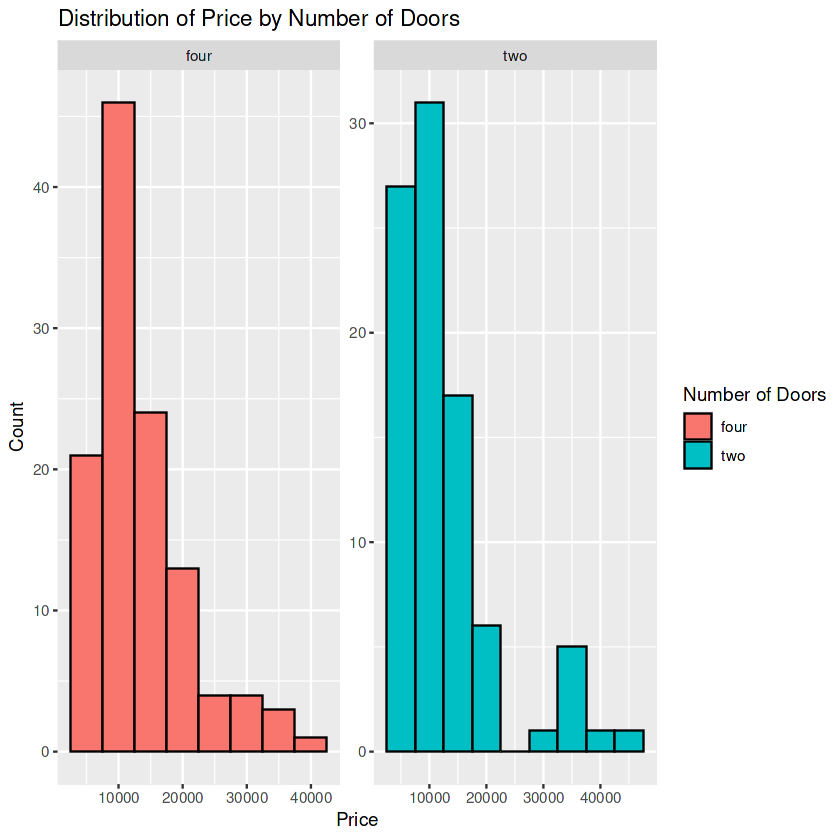

In [45]:
#Mostrar la distribucion del precio por el Atributo nDoors
#Como sugerencia debemos usar histogramas
ggplot(carIns_final, aes(x = price, fill = nDoors)) +
  geom_histogram(binwidth = 5000, color = "black") +
  facet_wrap(~ nDoors, ncol = 2, scales = "free") +
  labs(title = "Distribution of Price by Number of Doors", x = "Price", y = "Count") +
  scale_fill_discrete(name = "Number of Doors")


**(l) Show the distribution of price by bodyStyle and nDoors attributes. Suggestion: use histograms**

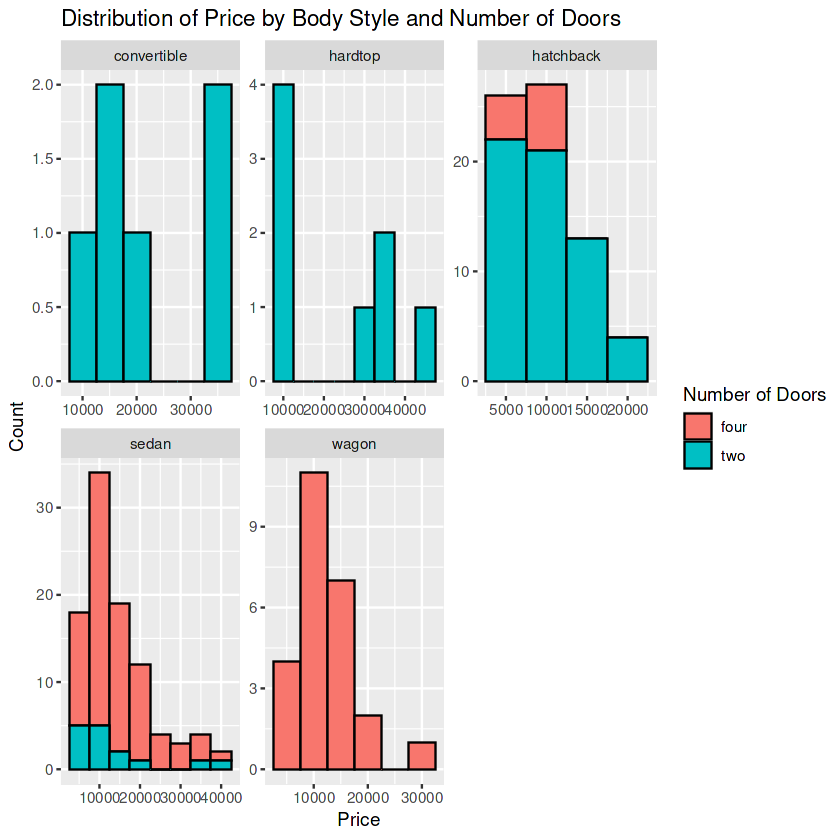

In [48]:
#Muestra la distribución del precio por atributos bodyStyle y nDoors. 
#Sugerencia: usa histogramas
ggplot(carIns_final, aes(x = price, fill = nDoors)) +
  geom_histogram(binwidth = 5000, color = "black") +
  facet_wrap(~ bodyStyle, nrow = 2, scales = "free") +
  labs(title = "Distribution of Price by Body Style and Number of Doors", x = "Price", y = "Count") +
  scale_fill_discrete(name = "Number of Doors")


**(m) Add the parameter scales="free_y" to the facet function in the previous graph.**

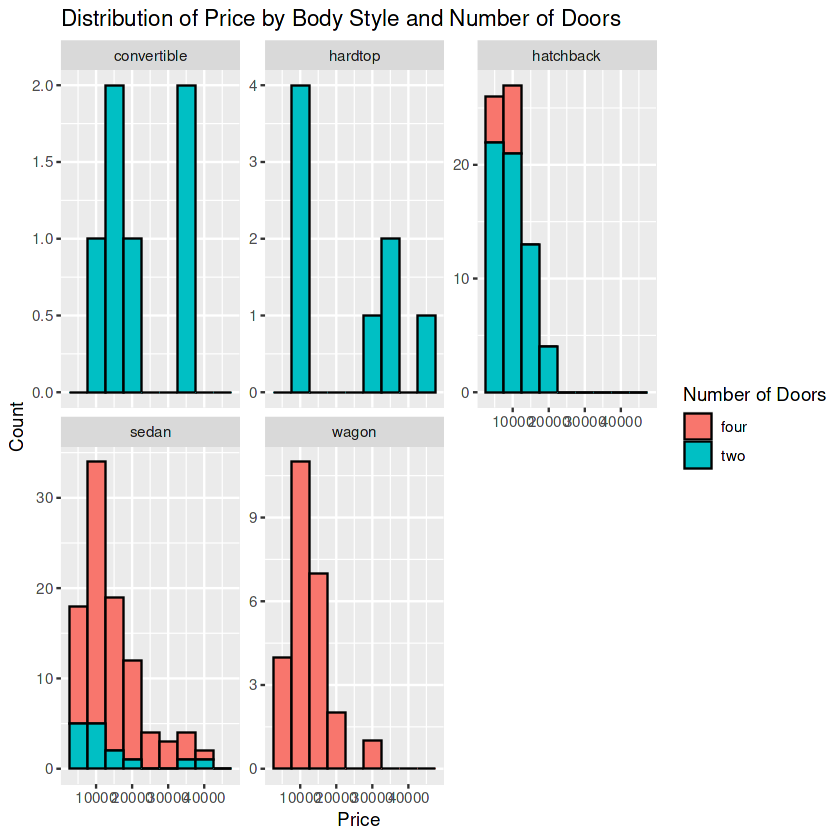

In [51]:
#Agregue el parámetro scales="free_y" a la función de faceta en el gráfico anterior.
ggplot(carIns_final, aes(x = price, fill = nDoors)) +
  geom_histogram(binwidth = 5000, color = "black") +
  facet_wrap(~ bodyStyle, nrow = 2, scales = "free_y") +
  labs(title = "Distribution of Price by Body Style and Number of Doors", x = "Price", y = "Count") +
  scale_fill_discrete(name = "Number of Doors")
